In [1]:
# Imports

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

In [2]:
# Load data

dataSk = loadmat("data/T1_data_Sk_Gaussian.mat")
dataBPSK = loadmat("data/T1_data_Sk_BPSK.mat")
dataH0 = loadmat("data/T3_data_x_H0.mat")
dataH1 = loadmat("data/T3_data_x_H1.mat")
dataSigmaW = loadmat("data/T3_data_sigma_w.mat")
dataSigmaS = loadmat("data/T3_data_sigma_s.mat")
dataNumExp = loadmat("data/T8_numerical_experiment.mat")

sk = dataSk['T1_data_Sk_Gaussian']
bpsk = dataBPSK["T1_data_Sk_BPSK"]
h0 = dataH0["T3_data_x_H0"]
h1 = dataH1["T3_data_x_H1"]
sigmaW = dataSigmaW["w"]
sigmaS = dataSigmaS["s_t"]
numExp = dataNumExp["T8_numerical_experiment"]

## Task 1

#### Gaussian PU data

In [3]:
# Applying idft to obtain sn

N = len(sk)
sn = np.zeros(N,  dtype=complex)

c = complex(0, 1)

for n in range(N):
    for k in range(N):
        sn[n] += 1/np.sqrt(N) * (sk[k] * np.exp((c * 2 * np.pi * k * n)/ N))


C:\Users\jakob\AppData\Local\Temp\ipykernel_28544\2573584098.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sn[n] += 1/np.sqrt(N) * (sk[k] * np.exp((c * 2 * np.pi * k * n)/ N))


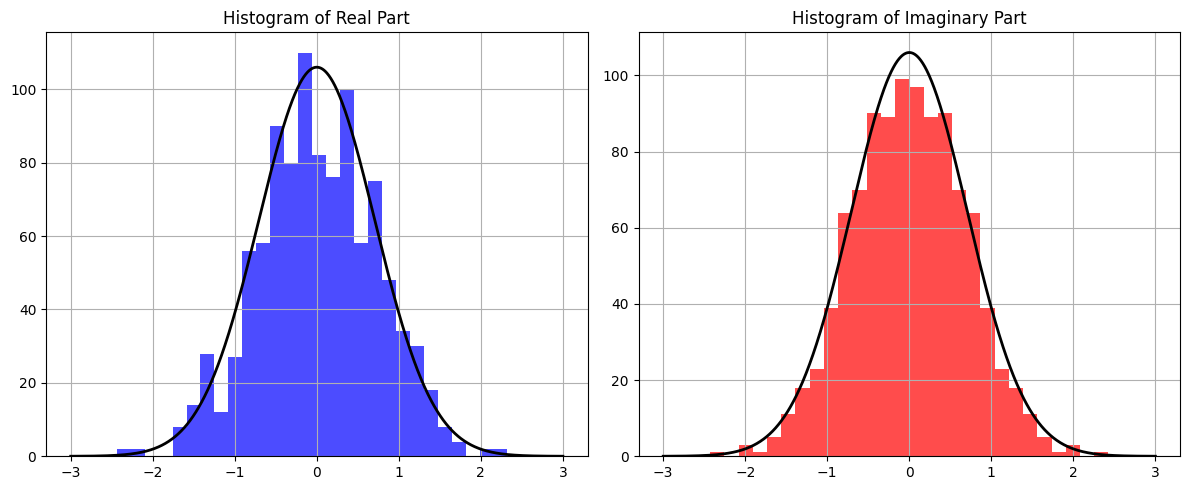

In [4]:
# Plotting sn values from Sk_Gaussian-dataset

snReal = sn.real.flatten()
snImag = sn.imag.flatten()

mu = 0 
var = 0.5
sigma = np.sqrt(var) 

x = np.linspace(-3, 3, 1000)
gaussianPDF = norm.pdf(x, mu, sigma)

# Scaling
histReal, binEdgesEeal = np.histogram(snReal, bins=30, density=False)
histImag, binEdgesImag = np.histogram(snImag, bins=30, density=False)
maxHistHeight = max(max(histReal), max(histImag))
gaussianPDF *= maxHistHeight / max(gaussianPDF)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(snReal, bins=28, color='blue', alpha=0.7)
ax[0].plot(x, gaussianPDF, 'k-', lw=2, label="Gaussian PDF")
ax[0].set_title("Histogram of Real Part")
ax[0].grid(True)

ax[1].hist(snImag, bins=28, color='red', alpha=0.7)
ax[1].plot(x, gaussianPDF, 'k-', lw=2, label="Gaussian PDF")
ax[1].set_title("Histogram of Imaginary Part")
ax[1].grid(True)

plt.tight_layout() 
plt.show()

In [5]:
# Estimating the expected values of snReal, snImag and their product

snRealMean = np.mean(snReal)
snImagMean = np.mean(snImag)
snRealImagMean = np.mean(snReal*snImag)

print(snRealMean)
print(snImagMean)
print(snRealImagMean)

0.016802098110817044
1.7034984534092246e-15
3.58046925441613e-15


#### BPSK PU data

In [6]:
N = len(bpsk)
snBpsk = np.fft.ifft(bpsk, axis=1) * np.sqrt(N)

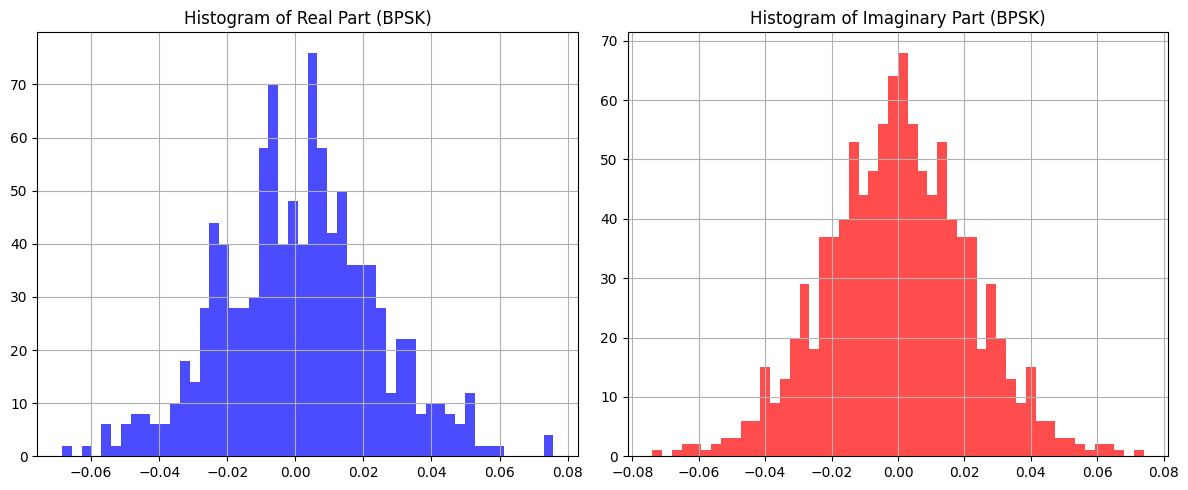

In [7]:
# Plotting sn values from Sk_BPSK-dataset

snBPSKReal = snBpsk.real.flatten()
snBPSKImag = snBpsk.imag.flatten()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(snBPSKReal, bins=50, color='blue', alpha=0.7)
ax[0].set_title("Histogram of Real Part (BPSK)")
ax[0].grid(True)

ax[1].hist(snBPSKImag, bins=50, color='red', alpha=0.7)
ax[1].set_title("Histogram of Imaginary Part (BPSK)")
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [8]:
# Estimating the expected values of snReal, snImag and their product

snBPSKRealMean = np.mean(snBPSKReal)
snBPSKImagMean = np.mean(snBPSKImag)
snBPSKRealImagMean = np.mean(snBPSKReal*snBPSKImag)

print(snRealMean)
print(snImagMean)
print(snRealImagMean)


0.016802098110817044
1.7034984534092246e-15
3.58046925441613e-15


## Task 3

In [9]:
# Estimating variances based on data and filling arrays with chi-squared values

sigmaW = np.var(sigmaW)
sigmaS = np.var(sigmaS)

imagH0 = np.imag(h0)
realH0 = np.real(h0)

imagH1 = np.imag(h1)
realH1 = np.real(h1)

chiH0 = np.zeros(1024, dtype= complex)
chiH1 = np.zeros(1024, dtype= complex)

for i in range(len(h0)):
    chiH0[i] = (1/sigmaW) * 2 *(imagH0[i]**2 + realH0[i]**2)

for i in range(len(h1)):
    chiH1[i] = (1/(sigmaW + sigmaS)) * 2 * (imagH1[i]**2 + realH1[i]**2)

C:\Users\jakob\AppData\Local\Temp\ipykernel_28544\706000149.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chiH0[i] = (1/sigmaW) * 2 *(imagH0[i]**2 + realH0[i]**2)
C:\Users\jakob\AppData\Local\Temp\ipykernel_28544\706000149.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chiH1[i] = (1/(sigmaW + sigmaS)) * 2 * (imagH1[i]**2 + realH1[i]**2)


C:\Users\jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
C:\Users\jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\histograms.py:884: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
C:\Users\jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


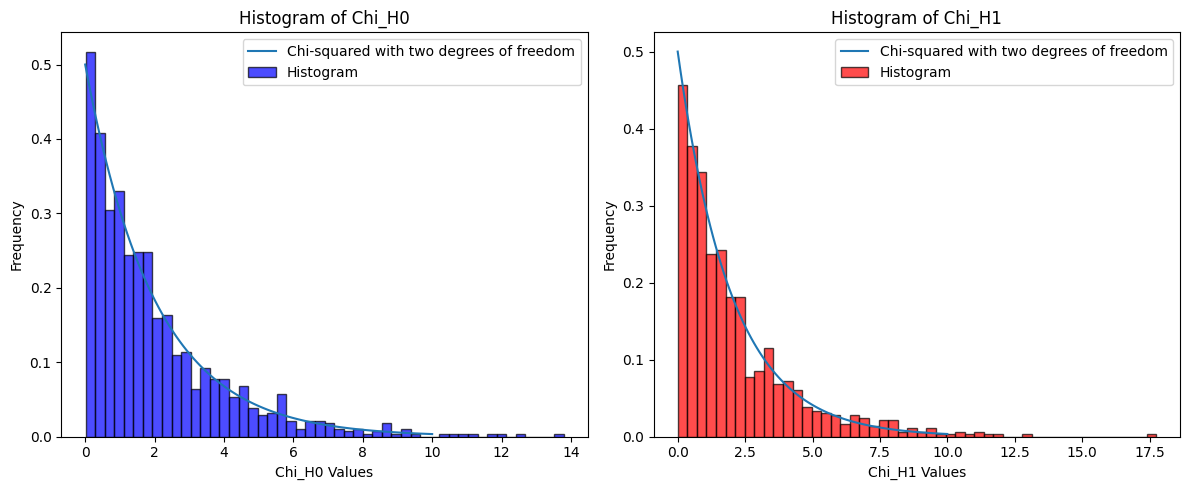

In [10]:
# Plotting histograms for H0 and H1

x = np.linspace(0, 10, 100)
H0Pdf = chi2.pdf(x, 2)
H1Pdf = chi2.pdf(x, 2)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(chiH0, bins=50, color='b', alpha=0.7, edgecolor='black', density=True)
plt.xlabel("Chi_H0 Values")
plt.ylabel("Frequency")
plt.plot(x, H0Pdf)
plt.legend(["Chi-squared with two degrees of freedom", "Histogram"])
plt.title("Histogram of Chi_H0")

plt.subplot(1, 2, 2)
plt.hist(chiH1, bins=50, color='r', alpha=0.7, edgecolor='black', density=True)
plt.plot(x, H0Pdf)
plt.legend(["Chi-squared with two degrees of freedom", "Histogram"])
plt.xlabel("Chi_H1 Values") 
plt.ylabel("Frequency")
plt.title("Histogram of Chi_H1")
plt.tight_layout()
plt.show()

In [11]:
# Calculating PD and PFa for one sample detector

lam = 0.5

threshold = (np.log(lam) - np.log(sigmaW/(sigmaW*sigmaS))*sigmaW*(sigmaW+sigmaS)/sigmaS)

PD = 1 - chi2.cdf((2*threshold)/(sigmaS + sigmaW), 2)
PFa = 1 - chi2.cdf((2*threshold)/(sigmaW), 2)

print(PD, PFa)

1.0 1.0


## Task 5

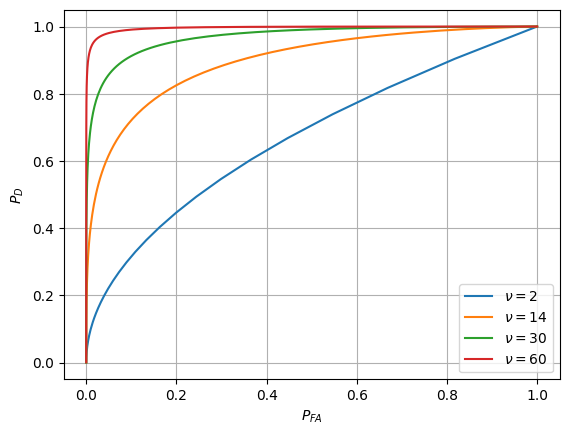

In [12]:
# Creating ROC

x = np.linspace(0, 100, 500)

K = [1, 7, 15, 30]

for k in K:
    dof = 2 * k 
    PFa = 1 - chi2.cdf(2*x / sigmaW, df=dof)
    PD  = 1 - chi2.cdf(2*x / (sigmaW + sigmaS), df=dof)
    plt.plot(PFa, PD, label=fr'$\nu = {dof}$')


plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.grid(True)
plt.legend()
plt.grid(True)
plt.show()

## Task 6

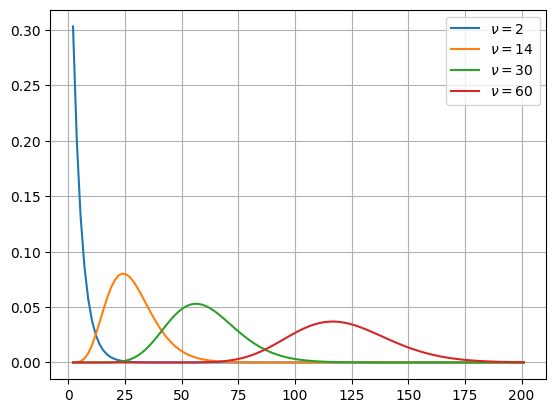

In [13]:
# Plotting chi-squared distributions with increasing dof

x = np.linspace(1, 100, 120)
K = [1, 7, 15, 30]

for k in K:
    dof = 2*k
    chi = chi2.pdf(x, dof)
    plt.plot(2*x / sigmaW, chi, label=fr'$\nu = {dof}$')

plt.legend()
plt.grid()
plt.show()


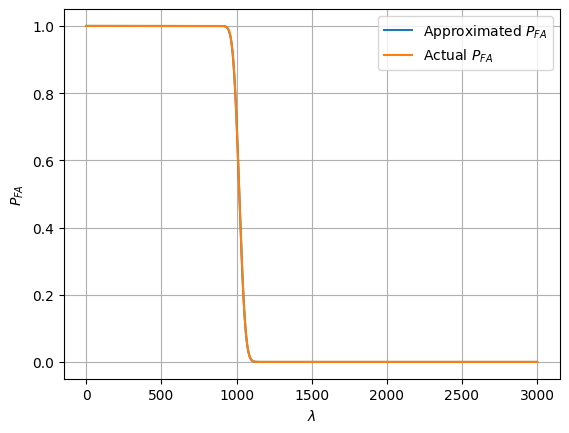

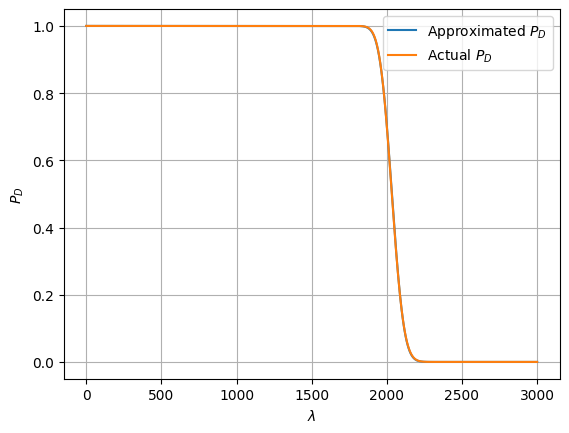

In [14]:
# Plotting PD and PFa along with their gaussian approximations

N = 1024
threshold = np.arange(0, 3000, 0.1)

PD = 1 - norm.cdf(threshold, loc=N*(sigmaW+sigmaS), scale=np.sqrt(N)*(sigmaW + sigmaS))
PFa = 1 - norm.cdf(threshold, loc=N*sigmaW, scale=np.sqrt(N)*sigmaW)

PDActual = 1 - chi2.cdf(2*threshold/(sigmaW+sigmaS), 2*N)
PFaActual = 1 - chi2.cdf(2*threshold/sigmaW, 2*N)

plt.figure()
plt.plot(threshold, PFa, label='Approximated $P_{FA}$')
plt.plot(threshold, PFaActual, label='Actual $P_{FA}$')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$P_{FA}$')
plt.legend()
plt.grid(True)

plt.figure()
plt.plot(threshold, PD, label='Approximated $P_D$')
plt.plot(threshold, PDActual, label='Actual $P_D$')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$P_D$')
plt.legend()
plt.grid(True)

plt.show()


## Task 8

PD: 0.9999999999999075


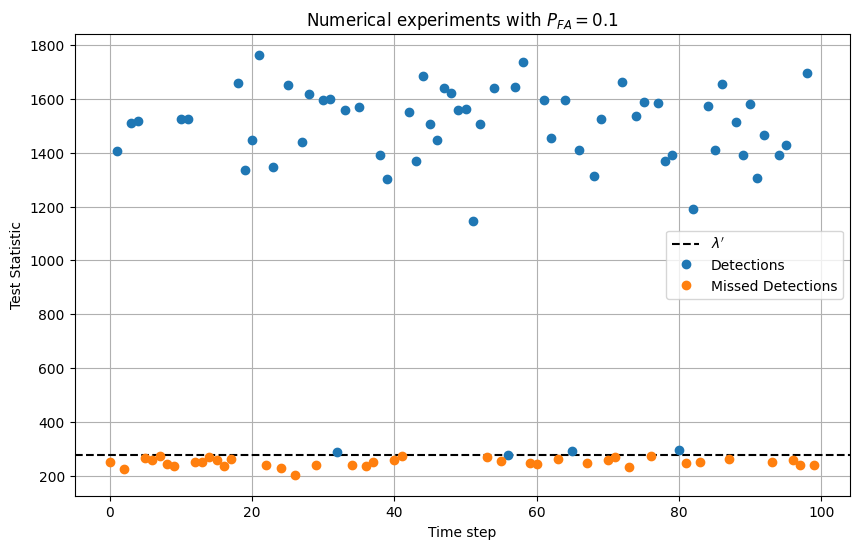

Detections: 61


In [18]:
noiseSigma = 1
signalSigma = np.sqrt(1)

def numericalExperiment(Pfa, K, gaussApprox=True):
    sigma0 = np.sqrt(K * (noiseSigma)**4)
    sigma1 = np.sqrt(K * (noiseSigma**2 + signalSigma**2)**2)

    mu0 = K * noiseSigma**2
    mu1 = K * (noiseSigma**2 + signalSigma**2)
    
    if gaussApprox:
        # Find the distributions under H0 and H1 using Gaussian approximation
        h0Norm = norm(mu0, sigma0)
        h1Norm = norm(mu1, sigma1)

        PD = 1 - h1Norm.cdf(h0Norm.ppf(1 - Pfa))
        print("PD:", PD)
        # Calculate the threshold based on given Pfa
        threshold = h0Norm.ppf(1 - Pfa)
    else:
        # Find the threshold when considering the test statistic as a scaled chi-squared distributed variable
        threshold = (noiseSigma) / 2 * chi2.ppf(1 - Pfa, 2*K)
    
    testStatistic = np.sum(np.abs(numExp[:K, :256])**2, axis=0)
    detections = np.copy(testStatistic)
    missedDetections = np.copy(testStatistic)

    numDetections = 0
    for i in range(len(testStatistic)):
        if testStatistic[i] > threshold:
            missedDetections[i] = None 
            numDetections += 1
        else:
            detections[i] = None

    # Plot the detections and threshold
    plt.figure(figsize=(10, 6))
    plt.axhline(threshold, color='black', linestyle='--', label="$\\lambda'$")
    plt.plot(detections, 'o', label='Detections')
    plt.plot(missedDetections, 'o', label='Missed Detections')
    plt.title(f'Numerical experiments with $P_{{FA}} = {Pfa}$')
    plt.xlabel('Time step')
    plt.ylabel('Test Statistic')
    plt.legend(loc="center right")
    plt.grid(True)
    plt.savefig("numerical_experiment_plot.pdf")
    plt.show()
    print('Detections:', numDetections)

Pfa = 0.1
numericalExperiment(Pfa, K=256, gaussApprox=True) # Change between true or false to use approximation or original distribution